In [118]:
library(ggplot2)
library(gridExtra)
library(reshape2)
library(RColorBrewer)
suppressMessages(library(plyr))
suppressMessages(library(dplyr))
library(stringr)
suppressMessages(library(tidyr))
theme_set(theme_bw())
library(parallel)
library(scales)
library(knitr)
library(IRdisplay)
suppressWarnings(suppressMessages(library(Biostrings)))
options(repr.plot.width=7, repr.plot.height=4)

isotypes = c('Ala', 'Arg', 'Asn', 'Asp', 'Cys', 'Gln', 'Glu', 'Gly', 'His', 'Ile', 'iMet', 'Leu', 'Lys', 'Met', 'Phe', 'Pro', 'Ser', 'Thr', 'Trp', 'Tyr', 'Val')
display_positions = c('X1.72'='1:72', 'X2.71'='2:71', 'X3.70'='3:70', 'X4.69'='4:69', 'X5.68'='5:68', 'X6.67'='6:67', 'X7.66'='7:66', 'X8'='8', 'X9'='9', 'X10.25'='10:25', 'X11.24'='11:24', 'X12.23'='12:23', 'X13.22'='13:22', 'X14'='14', 'X15'='15', 'X16'='16', 'X17'='17', 'X17a'='17a', 'X18'='18', 'X19'='19', 'X20'='20', 'X20a'='20a', 'X20b'='20b', 'X21'='21', 'X26'='26','X27.43'='27:43', 'X28.42'='28:42', 'X29.41'='29:41', 'X30.40'='30:40', 'X31.39'='31:39', 'X32'='32', 'X33'='33', 'X34'='34', 'X35'='35', 'X36'='36', 'X37'='37', 'X38'='38', 'X44'='44', 'X45'='45', 'X46'='46', 'X47'='47', 'X48'='48', 'X49.65'='49:65', 'X50.64'='50:64', 'X51.63'='51:63', 'X52.62'='52:62', 'X53.61'='53:61', 'X54'='54', 'X55'='55', 'X56'='56', 'X57'='57', 'X58'='58', 'X59'='59', 'X60'='60', 'X73'='73')

# includes all paired including 3d
#paired_positions = c('X1.72'='1:72', 'X2.71'='2:71', 'X3.70'='3:70', 'X4.69'='4:69', 'X5.68'='5:68', 'X6.67'='6:67', 'X7.66'='7:66', 'X8.14'='*8:14', 'X9.23'='*9:23', 'X10.25'='10:25', 'X10.45'='*10:45', 'X11.24'='11:24', 'X12.23'='12:23', 'X13.22'='13:22', 'X15.48'='*15:48','X18.55'='*18:55', 'X19.56'='*19:56', 'X22.46'='*22:46', 'X26.44'='*26:44', 'X27.43'='27:43', 'X28.42'='28:42', 'X29.41'='29:41', 'X30.40'='30:40', 'X31.39'='31:39', 'X49.65'='49:65', 'X50.64'='50:64', 'X51.63'='51:63', 'X52.62'='52:62', 'X53.61'='53:61', 'X54.58'='*54:58')
paired_positions = c('X1.72'='1:72', 'X2.71'='2:71', 'X3.70'='3:70', 'X4.69'='4:69', 'X5.68'='5:68', 'X6.67'='6:67', 'X7.66'='7:66', 'X10.25'='10:25', 'X11.24'='11:24', 'X12.23'='12:23', 'X13.22'='13:22', 'X27.43'='27:43', 'X28.42'='28:42', 'X29.41'='29:41', 'X30.40'='30:40', 'X31.39'='31:39', 'X49.65'='49:65', 'X50.64'='50:64', 'X51.63'='51:63', 'X52.62'='52:62', 'X53.61'='53:61')
paired_identities = c('GC', 'AU', 'UA', 'CG', 'GU', 'UG', 'PurinePyrimidine', 'PyrimidinePurine', 'StrongPair', 'WeakPair', 'AminoKeto', 'KetoAmino', 'Wobble', 'Paired', 'Bulge', 'Mismatched', 'Absent')

single_positions = c('X8'='8', 'X9'='9', 'X14'='14', 'X15'='15', 'X16'='16', 'X17'='17', 'X17a'='17a', 'X18'='18', 'X19'='19', 'X20'='20', 'X20a'='20a', 'X20b'='20b', 'X21'='21', 'X26'='26', 'X32'='32', 'X33'='33', 'X34'='34', 'X35'='35', 'X36'='36', 'X37'='37', 'X38'='38', 'X44'='44', 'X45'='45', 'X46'='46', 'X47'='47', 'X48'='48', 'X54'='54', 'X55'='55', 'X56'='56', 'X57'='57', 'X58'='58', 'X59'='59', 'X60'='60', 'X73'='73')
single_identities = c('A', 'C', 'G', 'U', 'Purine', 'Pyrimidine', 'Weak', 'Strong', 'Amino', 'Keto', 'B', 'D', 'H', 'V', 'N', 'Absent')

colors = c('A '='gray20', 'C '='gray20', 'G '='gray20', 'U '='gray20', 'Absent '='gray20', 'Purine '='gray20', 'Pyrimidine '='gray20', 'Weak'='gray20', 'Strong'='gray20', 'Amino'='gray20', 'Keto'='gray20', 'B'='gray50', 'D'='gray50', 'H'='gray50', 'V'='gray50', 'N' = 'gray20', 'GC'='gray20', 'AU'='gray20', 'UA'='gray20', 'CG'='gray20', 'GU'='gray20', 'UG'='gray20', 'PurinePyrimidine'='gray20', 'PyrimidinePurine'='gray20', 'StrongPair'='gray20', 'WeakPair'='gray20', 'AminoKeto'='gray20', 'KetoAmino'='gray20', 'Wobble'='gray20', 'Paired '='gray20', 'Bulge '='gray20', 'Mismatched '='gray20', 'High mismatch rate' = 'gray20')
fills = c('A '='#ffd92f', 'C '='#4daf4a', 'G '='#e41a1c', 'U '='#377eb8', 'Purine '='#ff8300', 'Pyrimidine '='#66c2a5', 'Weak'='#b3de69', 'Strong'='#fb72b2', 'Amino'='#c1764a', 'Keto'='#b26cbd', 'B '='#e5c494', 'D'='#ccebd5', 'H'='#ffa79d', 'V'='#a6cdea', 'N' = 'white', 'Absent '='gray40', 'Mismatched '='gray40', 'Paired '='#ffffcc', 'High mismatch rate' = 'gray70')

# simple codes for reviewer #3
simple_identities = c('A' = 'A ', 'C' = 'C ', 'G' = 'G ', 'U' = 'U ', 'Purine' = 'Purine ', 'Pyrimidine' = 'Pyrimidine ', 
                      'Weak' = 'A/U (W) ', 'Strong' = 'G/C (S) ', 'Amino' = 'A/C (M) ', 'Keto' = 'G/U (K) ', 
                      'B' = 'C/G/U (B) ', 'D' = 'A/G/U (D) ', 'H' = 'A/C/U (H) ', 'V' = 'A/C/G (V) ', 'N' = 'N ', 'Absent' = 'Absent ', 'Paired' = 'Paired ', 'Mismatched' = 'Mismatched ', 'X' = 'High mismatch rate ')
colors = c(colors, 'A/U (W) ' = 'gray20', 'G/C (S) ' = 'gray20', 'A/C (M) ' ='gray20', 'G/U (K) ' = 'gray20', 'C/G/U (B) ' = 'gray50', 'A/G/U (D) ' = 'gray50', 'A/C/U (H) ' = 'gray50', 'A/C/G (V) ' = 'gray50', 'N ' = 'gray20', 'High mismatch rate ' = 'gray20')
fills = c(fills, 'A/U (W) ' = '#b3de69', 'G/C (S) ' = '#fb72b2', 'A/C (M) ' ='#c1764a', 'G/U (K) ' = '#b26cbd', 'C/G/U (B) ' = '#e5c494', 'A/G/U (D) ' = '#ccebd5', 'A/C/U (H) ' = '#ffa79d', 'A/C/G (V) ' = '#a6cdea', 'N ' = 'white', 'High mismatch rate ' = 'gray70')

In [2]:
identities = read.delim('identities-071917.tsv', sep='\t')
identities$quality = as.logical(identities$quality)
identities$restrict = as.logical(identities$restrict)
identities = identities %>% filter(isotype %in% isotypes)

In [5]:
load('best-freqs.RData')
load('clade-isotype-specific.RData')
load('isotype-specific.RData')
load('consensus-IDEs.RData')
load('clade-isotype-freqs.RData')

# Universal and near-universal sequence features

In [7]:
clade_iso_freqs %>%
  group_by(positions, feature) %>%
  summarize(freq = sum(n) / sum(clade_iso_pos_total)) %>% 
  filter((positions == 'X8.14' & feature == 'UA') | 
         (positions == 'X14' & feature == 'A') | 
         (positions == 'X9' & feature == 'Purine') | 
         (positions == 'X11.24' & feature == 'PyrimidinePurine') | 
         (positions == 'X15.48' & feature == 'PurinePyrimidine') | 
         (positions == 'X16' & feature == 'Pyrimidine') |  
         (positions == 'X18.55' & feature == 'GU') |  
         (positions == 'X55' & feature == 'U') | 
         (positions == 'X19.56' & feature == 'GC') | 
         (positions == 'X21' & feature == 'A') | 
         (positions == 'X32' & feature == 'Pyrimidine') | 
         (positions == 'X33' & feature == 'Pyrimidine') | 
         (positions == 'X33' & feature == 'U') | 
         (positions == 'X37' & feature == 'Purine') | 
         (positions == 'X46' & feature == 'Purine') | 
         (positions == 'X48' & feature == 'Pyrimidine') | 
         (positions == 'X52.62' & feature == 'PurinePyrimidine') | 
         (positions == 'X53.61' & feature == 'GC') | 
         (positions == 'X54.58' & feature == 'UA') | 
         (positions == 'X57' & feature == 'Purine') | 
         (positions == 'X60' & feature == 'Pyrimidine'))

,positions,feature,freq
1,X11.24,PyrimidinePurine,0.973313115996967
2,X14,A,0.996702047005307
3,X15.48,PurinePyrimidine,0.933318169756245
4,X16,Pyrimidine,0.905496588324488
5,X18.55,GU,0.985936315390447
6,X19.56,GC,0.971796815769522
7,X21,A,0.993858984078848
8,X32,Pyrimidine,0.988172858225929
9,X33,Pyrimidine,0.993517816527672
10,X33,U,0.984382107657316


# No. genomes and tRNAs

In [8]:
identities %>% group_by(clade, restrict) %>% summarize(Genomes = length(unique(species)), tRNAs = n()) %>% spread(restrict, tRNAs)

,clade,Genomes,FALSE,TRUE
1,Fungi,60,10805,621
2,Insecta,4,978,21
3,Mammalia,38,14544,37851
4,Nematoda,6,4551,369
5,Spermatophyta,3,1705,87
6,Streptophyta,8,4928,592
7,Vertebrata,17,10129,23057


# Isotype-specific sequence features

In [85]:
get_5prime = Vectorize(function(identity) c("A"="A", "G"="G", "C"="C", "U"="U", "Purine"="Purine", "Pyrimidine"="Pyrimidine", "Amino"="Amino", "Keto"="Keto", "Weak"="Weak", "Strong"="Strong", "B"="B", "H"="H", "D"="D", "V"="V","N"="N",
                                            "GC"="G", "AU"="A", "UA"="U", "CG"="C", "GU"="G", "UG"="U", "Absent"="Absent", "PurinePyrimidine"="Purine", "PyrimidinePurine"="Pyrimidine", "StrongPair"="Strong", "WeakPair"="Weak", "AminoKeto"="Amino", "KetoAmino"="Keto", "Paired"="Paired", "Bulge"="Bulge", "Mismatched"="Mismatched", "X"="X")[identity])
get_3prime = Vectorize(function(identity) c("A"="A", "G"="G", "C"="C", "U"="U", "Purine"="Purine", "Pyrimidine"="Pyrimidine", "Amino"="Amino", "Keto"="Keto", "Weak"="Weak", "Strong"="Strong", "B"="B", "H"="H", "D"="D", "V"="V","N"="N",
                                            "GC"="C", "AU"="U", "UA"="A", "CG"="G", "GU"="U", "UG"="G", "Absent"="Absent", "PurinePyrimidine"="Pyrimidine", "PyrimidinePurine"="Purine", "StrongPair"="Strong", "WeakPair"="Weak", "AminoKeto"="Keto", "KetoAmino"="Amino", "Paired"="Paired", "Bulge"="Bulge", "Mismatched"="Mismatched", "X"="X")[identity])

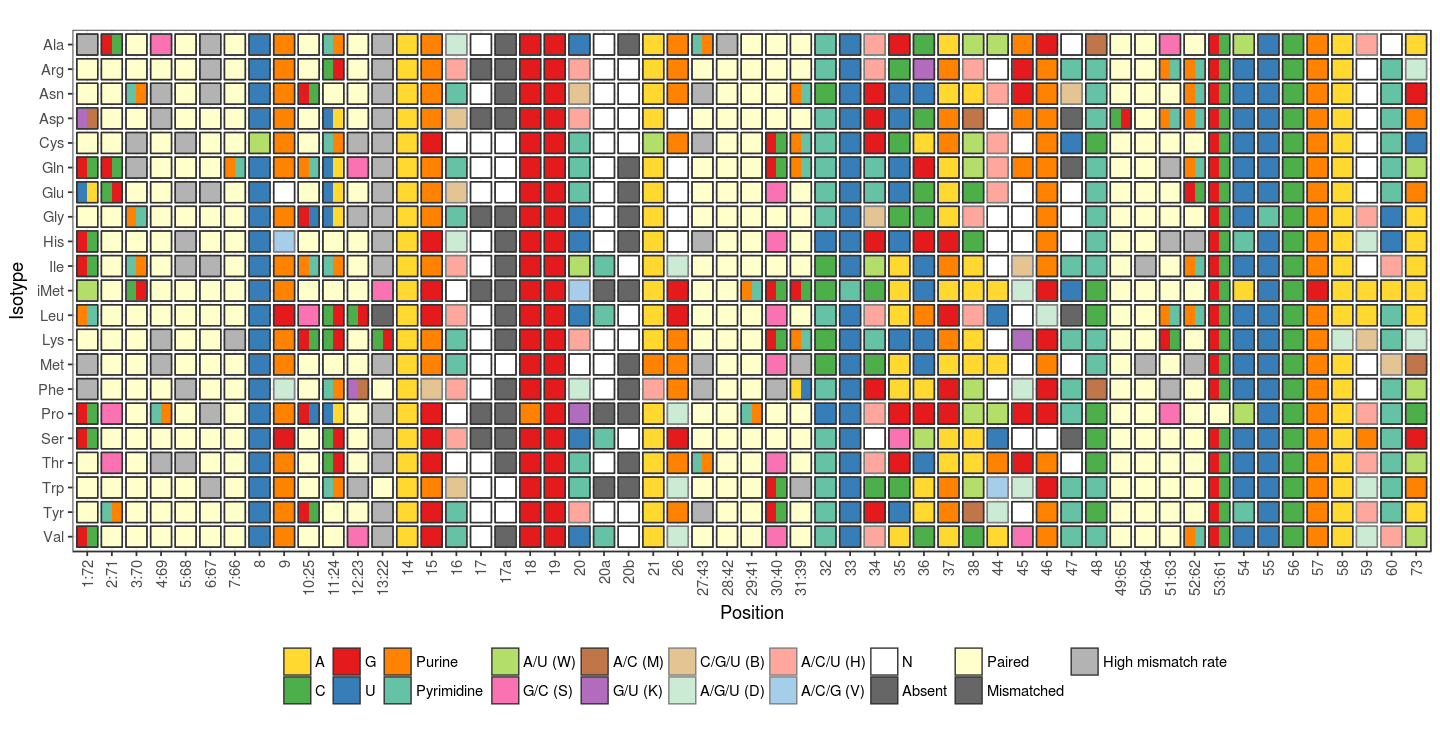

In [122]:
plot = isotype_specific %>% 
  filter(positions %in% names(display_positions)) %>% 
  mutate(positions=factor(positions, names(display_positions))) %>%
  ungroup() %>%
  mutate(isotype=factor(isotype, levels=rev(isotypes))) %>% 
  rbind(expand.grid(isotype = isotypes, positions = names(paired_positions), identity = 'X')) %>%
  rbind(expand.grid(isotype = isotypes, positions = names(single_positions), identity = 'N')) %>%
  group_by(isotype, positions) %>% summarize(identity = ifelse((length(identity) > 1) & (identity[1] %in% c('X', 'N')), identity[2], identity[1])) %>%  mutate(left=get_5prime(identity), right=get_3prime(identity)) %>%
  gather(side, half_identity, left, right, -isotype, -positions, -identity) %>%
  mutate(half_identity = revalue(half_identity, simple_identities, warn_missing = FALSE), identity = revalue(identity, simple_identities, warn_missing = FALSE)) %>%
  mutate(side = as.integer(as.factor(side)) - 1) %>% 
  mutate(xmin = as.integer(positions) + 0.5 * side - 0.5 + 0.1 * (1 - side),
         xmax = as.integer(positions)+ 0.5 * side - 0.1 * side,
         ymin = as.integer(isotype) - 0.5 + 0.1,
         ymax = as.integer(isotype) + 0.5 - 0.1) %>%
  mutate(half_identity=factor(half_identity)) %>%
  ggplot() + 
    geom_rect(aes(xmin=xmin, xmax=xmax, ymin=ymin, ymax=ymax, fill=half_identity)) + 
    geom_tile(aes(x=positions, y=isotype, color=identity), alpha=0, width=0.85, height=0.85, size=0.4) +
    scale_x_discrete(labels = display_positions, drop = FALSE) +
    scale_y_discrete(limits = rev(isotypes), breaks = rev(isotypes)) +
    scale_color_manual(breaks = simple_identities, values = colors) + 
    scale_fill_manual(breaks = simple_identities, values = fills) +
    guides(fill=guide_legend(title=NULL, nrow=2), color=guide_legend(title=NULL, nrow=2), alpha=FALSE) +    
    theme(axis.text.x=element_text(angle=90, hjust=1, vjust=0.5), legend.position='bottom') + 
    xlab('Position') + ylab('Isotype') + coord_equal()
  
options(repr.plot.width=12, repr.plot.height=6.2)
plot
ggsave(plot, filename = "fig2-isotype-specific.pdf", width = 12, height = 6.2)

# Clade-specific sequence features

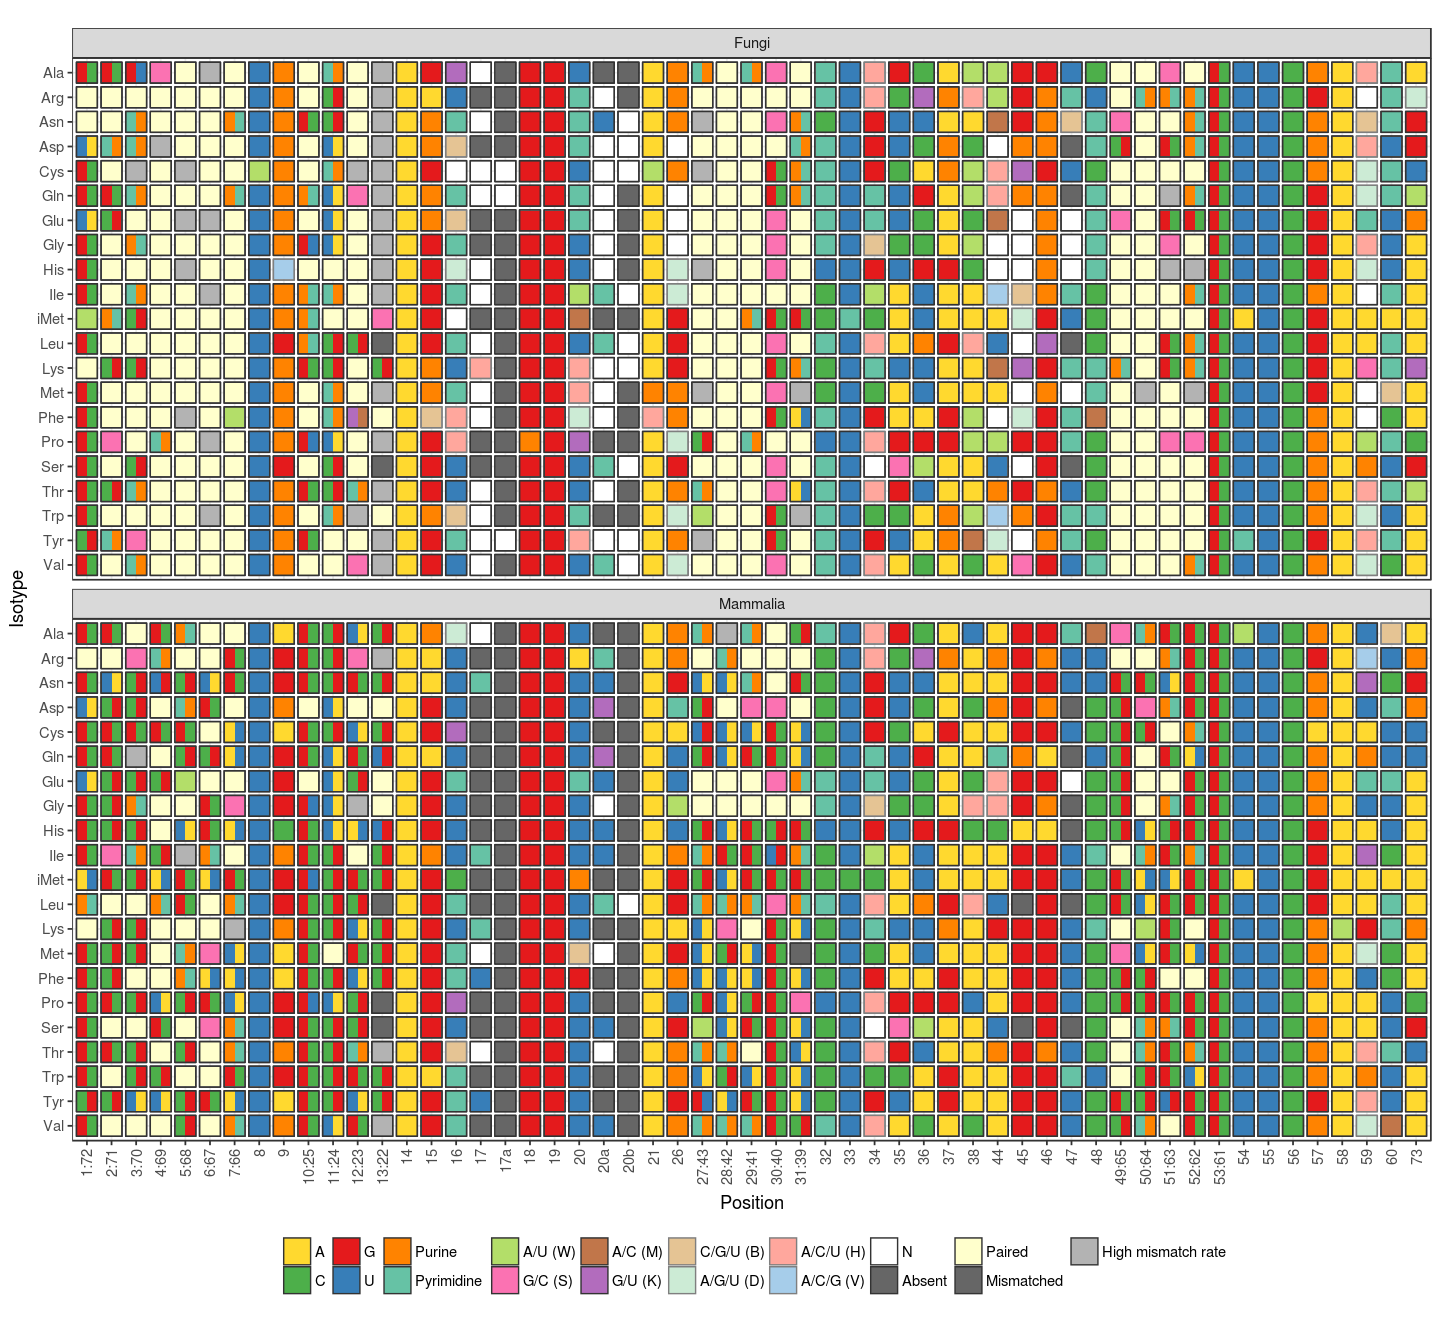

In [128]:
plot = clade_isotype_specific %>% 
  filter(positions %in% names(display_positions)) %>% 
  filter(clade %in% c("Mammalia", "Fungi")) %>%
  mutate(positions = factor(positions, names(display_positions))) %>%
  ungroup() %>%
  mutate(isotype = factor(isotype, levels = rev(isotypes))) %>%
  mutate(clade = factor(clade, levels = c("Fungi", "Mammalia"))) %>%
  rbind(expand.grid(isotype = isotypes, positions = names(paired_positions), clade = c('Fungi', 'Mammalia'), identity = 'X')) %>%
  rbind(expand.grid(isotype = isotypes, positions = names(single_positions), clade = c('Fungi', 'Mammalia'), identity = 'N')) %>%
  group_by(isotype, clade, positions) %>% summarize(identity = ifelse((length(identity) > 1) & (identity[1] %in% c('X', 'N')), identity[2], identity[1])) %>%  mutate(left=get_5prime(identity), right=get_3prime(identity)) %>%
  mutate(left = get_5prime(identity), right = get_3prime(identity)) %>%
  gather(side, half_identity, left, right, -isotype, -clade, -positions, -identity) %>%
  mutate(half_identity = revalue(half_identity, simple_identities, warn_missing = FALSE), identity = revalue(identity, simple_identities, warn_missing = FALSE)) %>% 
  mutate(side = as.integer(as.factor(side)) - 1) %>% 
  mutate(xmin = as.integer(positions) + 0.5 * side - 0.5 + 0.1 * (1 - side),
         xmax = as.integer(positions)+ 0.5 * side - 0.1 * side,
         ymin = as.integer(isotype) - 0.5 + 0.1,
         ymax = as.integer(isotype) + 0.5 - 0.1) %>%
  mutate(half_identity=factor(half_identity)) %>% 
  ggplot() + 
    geom_rect(aes(xmin = xmin, xmax = xmax, ymin = ymin, ymax = ymax, fill = half_identity)) + 
    geom_tile(aes(x = positions, y = isotype, color = identity), alpha = 0, width = 0.85, height = 0.85, size = 0.4) + 
    facet_wrap(~ clade, nrow = 2) +
    scale_x_discrete(labels = display_positions, drop = FALSE) +
    scale_y_discrete(limits = rev(isotypes), breaks = rev(isotypes)) +
    scale_color_manual(breaks = simple_identities, values = colors) + 
    scale_fill_manual(breaks = simple_identities, values = fills) +
    theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.5), legend.position = "bottom") +
    guides(fill = guide_legend(title = NULL, nrow = 2), color = guide_legend(title = NULL, nrow = 2), alpha = FALSE) +
    xlab('Position') + ylab('Isotype') + coord_equal()

options(repr.plot.width=12, repr.plot.height=11.1)
plot
ggsave(plot, filename = 'fig3a-clade-specific.pdf', width = 12, height = 11.1)

## Cross-clade difference heatmap

Strategy: (1) generate isotype-clade-specific covariance model, (2) align all tRNAs of the other clade to the model, (4) parse position-specific bit scores, (5) average scores by position and isotype, (6) plot!

In [31]:
compare_clade_bits = function(clade1, clade2) {
  
  bits = data.frame()  
  euk_seqs = readDNAStringSet(filepath = '/projects/lowelab/users/blin/identity/euk-isotypes/euk-tRNAs.fa', format = 'fasta')
  names(euk_seqs) = str_replace(str_extract(names(euk_seqs), '\\S+'), '\\|', '_')

  # Get bit scores for each position in each isotype
  for (current_isotype in isotypes) {
    subset = identities %>% filter(!restrict, isotype == current_isotype, clade == clade1)
    writeXStringSet(euk_seqs[match(subset$seqname, names(euk_seqs))], filepath = paste0(clade1, '-', current_isotype, '.fa'))
  
    # create covariance model from clade 1
    system(paste0('cmalign -g --notrunc --matchonly -o ', clade1, '-', current_isotype, '.sto /projects/lowelab/users/blin/tRNAscan/models/domain-specific/euk-num-092016.cm ', clade1, '-', current_isotype,'.fa > /dev/null'))
    system(paste0('cmbuild --hand --enone -F ', clade1, '-', current_isotype, '.cm ', clade1, '-', current_isotype, '.sto > /dev/null'))

    # align clade 2 tRNAs to clade 1 cm
    subset = identities %>% filter(!restrict, isotype == current_isotype, clade == clade2)
    writeXStringSet(euk_seqs[match(subset$seqname, names(euk_seqs))], filepath = paste0(clade2, '-', current_isotype, '.fa'))
    system(paste0('cmalign -g --notrunc --matchonly --tfile ', clade1, '-', clade2, '-', current_isotype, '.tfile ', clade1, '-', current_isotype, '.cm ', clade2, '-', current_isotype, '.fa > /dev/null'))
    system(paste0('python parse-parsetree.py ', clade1, '-', clade2, '-', current_isotype, '.tfile > ', clade1, '-', clade2, '-', current_isotype, '.bits'))
    
    # Add to data frame
    df = read.table(paste0(clade1, '-', clade2, '-', current_isotype, '.bits'), comment.char = '', header = FALSE) %>% 
      mutate(Isotype = current_isotype, Clade = clade2)
    bits = rbind(bits, df)

    # clean up
    system(paste0('rm ', clade1, '-', clade2, '-', current_isotype, '.tfile ', clade1, '-', clade2, '-', current_isotype, '.bits'))
    system(paste0('rm ', clade1, '-', current_isotype, '.fa ', clade1, '-', current_isotype, '.sto ', clade1, '-', current_isotype, '.cm ', clade2, '-', current_isotype, '.fa'))
  }
  
  bits %>% mutate(Position = factor(V2, c('1:72', '2:71', '3:70', '4:69', '5:68', '6:67', '7:66', '8', '9', '10:25', '11:24', '12:23', '13:22', '14', '15', '16', '17', '17a', '18', '19', '20', '20a', '20b', '21', '26', '27:43', '28:42', '29:41', '30:40', '31:39', '32', '33', '34', '35', '36', '37', '38', '44', '45', '46', '47', '48', '49:65', '50:64', '51:63', '52:62', '53:61', '54', '55', '56', '57', '58', '59', '60', '73')),
                       Bits = V3,
                       Identity = V4) %>%
    select(-V1, -V2, -V3, -V4) %>%
    filter(!is.na(Position)) %>%
    group_by(Position, Isotype, Clade) %>%
    summarize(Bits = mean(Bits)) %>%
    ungroup
}

In [35]:
bits = compare_clade_bits("Fungi", "Mammalia")

In [37]:
bits = rbind(bits, compare_clade_bits("Fungi", "Fungi"))

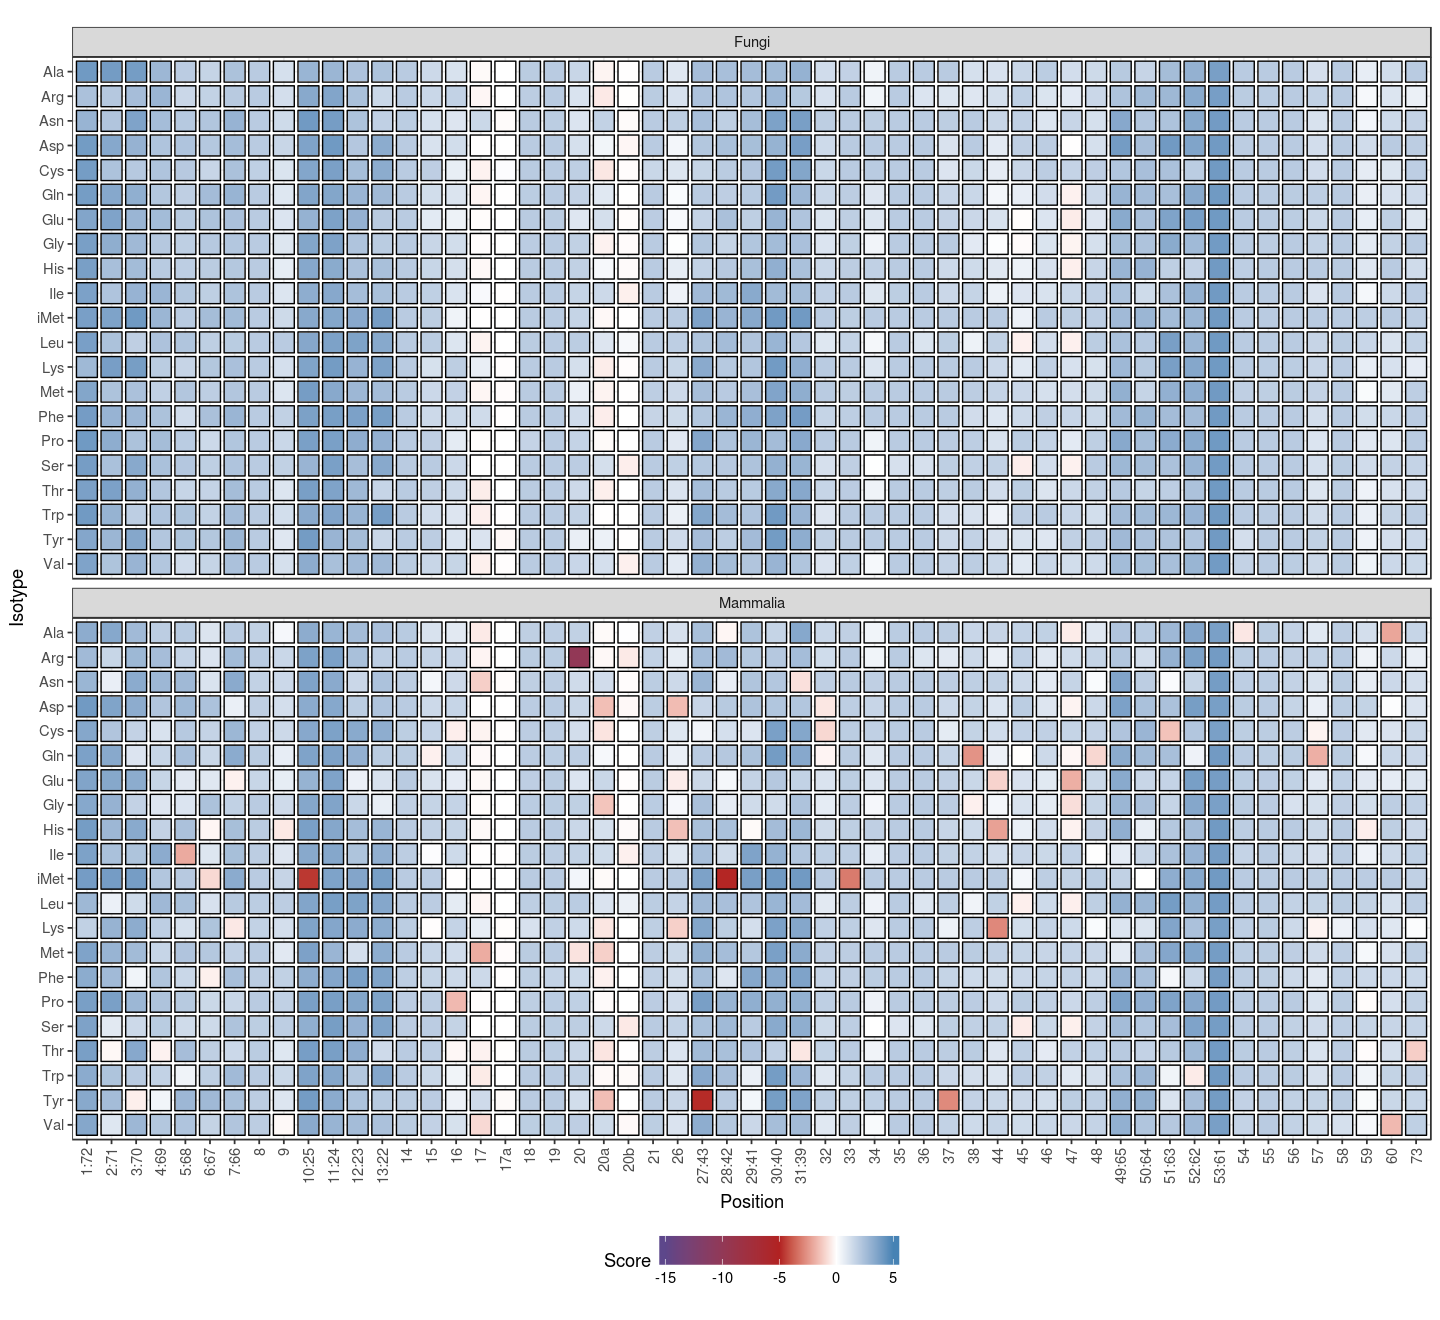

In [40]:
plot = bits %>%
    ggplot() + geom_tile(aes(x = Position, y = Isotype, fill = Bits), width = 0.8, height = 0.8) +
    geom_tile(aes(x = Position, y = Isotype), alpha = 0, color = 'black', width = 0.85, height = 0.85, size = 0.4) +
    facet_wrap(~ Clade, nrow = 2) +
    scale_x_discrete(labels = display_positions, drop = FALSE) +
    scale_y_discrete(limits = rev(isotypes), breaks = rev(isotypes)) +
    scale_fill_gradientn(colors = c("mediumpurple4", "firebrick", "white", "steelblue"),
                         values = c(0, 0.5, 0.75, 1),
                         limits = c(-15, 5)) +
    theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.5), legend.position = "bottom") +
    guides(fill = guide_colorbar(title = "Score", barwidth = 10)) + 
    xlab('Position') + ylab('Isotype') + coord_equal()

options(repr.plot.width=12, repr.plot.height=11)
plot
ggsave(plot, filename='fig3b-clade-isotype-specific.pdf', width=12, height=11)

## Isotype-isotype comparison

In [198]:
compare_isotype_bits = function(current_clade) {
  
  bits = data.frame()  
  euk_seqs = readDNAStringSet(filepath = '/projects/lowelab/users/blin/identity/euk-isotypes/euk-tRNAs.fa', format = 'fasta')
  names(euk_seqs) = str_replace(str_extract(names(euk_seqs), '\\S+'), '\\|', '_')

  # Get bit scores for each position in each isotype
  for (current_isotype in isotypes) {
    subset = identities %>% filter(!restrict, isotype == current_isotype, clade == current_clade)
    writeXStringSet(euk_seqs[match(subset$seqname, names(euk_seqs))], filepath = paste0(current_clade, '-', current_isotype, '.fa'))
  
    # create covariance model from input isotype
    system(paste0('cmalign -g --notrunc --matchonly -o ', current_clade, '-', current_isotype, '.sto /projects/lowelab/users/blin/tRNAscan/models/domain-specific/euk-num-092016.cm ', current_clade, '-', current_isotype,'.fa > /dev/null'))
    system(paste0('cmbuild --hand --enone -F ', current_clade, '-', current_isotype, '.cm ', current_clade, '-', current_isotype, '.sto > /dev/null'))

    # align isotype 2 tRNAs to isotype 1 cm
    subset = identities %>% filter(!restrict, isotype != current_isotype, clade == current_clade)
    writeXStringSet(euk_seqs[match(subset$seqname, names(euk_seqs))], filepath = paste0(current_clade, '-not-', current_isotype, '.fa'))
    system(paste0('cmalign -g --notrunc --matchonly --tfile ', current_clade, '-', current_isotype, '.tfile ', current_clade, '-', current_isotype, '.cm ', clade, '-not-', current_isotype, '.fa > /dev/null'))
    system(paste0('python parse-parsetree.py ', current_clade, '-', current_isotype, '.tfile > ', current_clade, '-', current_isotype, '.bits'))
    
    # Add to data frame
    df = read.table(paste0(current_clade, '-', current_isotype, '.bits'), comment.char = '', header = FALSE) %>% 
      mutate(Isotype = current_isotype)
    bits = rbind(bits, df)

    # clean up
    system(paste0('rm ', clade, '-', current_isotype, '.tfile ', current_clade, '-', current_isotype, '.bits'))
    system(paste0('rm ', clade, '-', current_isotype, '.fa ', current_clade, '-', current_isotype, '.sto ', current_clade, '-', current_isotype, '.cm ', current_clade, '-not-', current_isotype, '.fa'))
  }
  
  bits %>% mutate(Position = factor(V2, c('1:72', '2:71', '3:70', '4:69', '5:68', '6:67', '7:66', '8', '9', '10:25', '11:24', '12:23', '13:22', '14', '15', '16', '17', '17a', '18', '19', '20', '20a', '20b', '21', '26', '27:43', '28:42', '29:41', '30:40', '31:39', '32', '33', '34', '35', '36', '37', '38', '44', '45', '46', '47', '48', '49:65', '50:64', '51:63', '52:62', '53:61', '54', '55', '56', '57', '58', '59', '60', '73')),
                  Bits = V3,
                  Identity = V4,
                  Clade = current_clade) %>%
    select(-V1, -V2, -V3, -V4) %>%
    filter(!is.na(Position)) %>%
    group_by(Position, Isotype, Clade) %>%
    summarize(Bits = mean(Bits)) %>%
    ungroup
}

In [199]:
isotype_bits = data.frame()
for (clade in clades) isotype_bits = rbind(isotype_bits, compare_isotype_bits(clade))

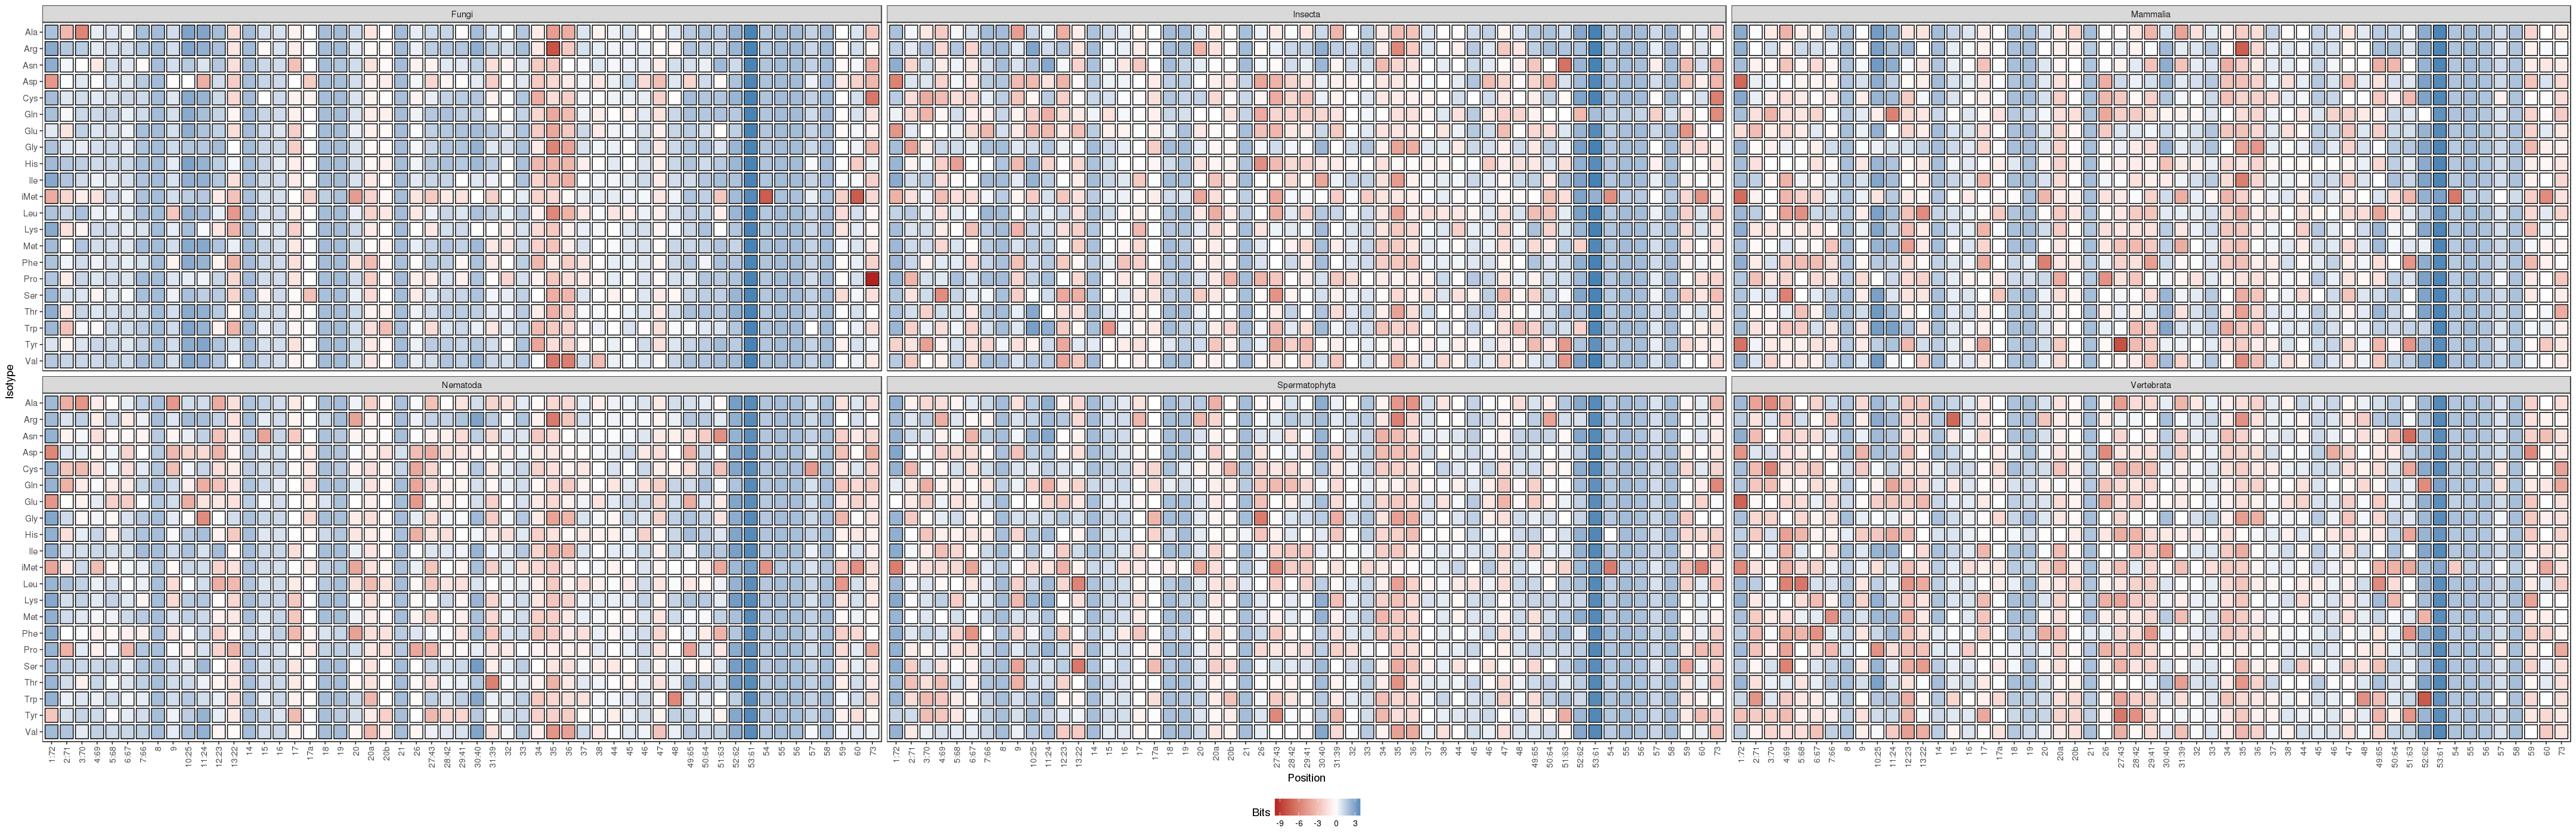

In [202]:
plot = isotype_bits %>%
    ggplot() + geom_tile(aes(x = Position, y = Isotype, fill = Bits), width = 0.8, height = 0.8) +
    geom_tile(aes(x = Position, y = Isotype), alpha = 0, color = 'black', width = 0.85, height = 0.85, size = 0.4) +
    facet_wrap(~ Clade) +
    scale_x_discrete(labels = display_positions, drop = FALSE) +
    scale_y_discrete(limits = rev(isotypes), breaks = rev(isotypes)) +
    scale_fill_gradientn(colors = c('firebrick', 'white', high = 'steelblue'), breaks = c(-9, -6, -3, 0, 3), values = c(0, - min(bits$Bits) / (max(bits$Bits) - min(bits$Bits)), 1)) +
    theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.5), legend.position = "bottom") +
    xlab('Position') + ylab('Isotype')

options(repr.plot.width=36, repr.plot.height=11.7)
plot

# Supplementary tables & figures

## Clade-isotype restricted set stats

In [23]:
df = identities %>% group_by(isotype, clade, restrict) %>% 
  summarize(count = n()) %>%
  ungroup()

df = rbind(df, cbind(expand.grid(isotype = unique(df$isotype), 
                                 clade = unique(df$clade), 
                                 restrict = unique(df$restrict)), count = 0)) %>%
  rbind(df %>% group_by(clade, restrict) %>% summarize(isotype = "Total", count = sum(count)) %>% ungroup) %>%
  rbind(df %>% group_by(isotype, restrict) %>% summarize(clade = "Total", count = sum(count)) %>% ungroup) %>%
  rbind(df %>% group_by(restrict) %>% summarize(isotype = "Total", clade = "Total", count = sum(count)) %>% ungroup)

df %>% group_by(isotype, clade, restrict) %>% 
  summarize(count = sum(count)) %>%
  group_by(isotype, clade) %>%
  arrange(restrict) %>%
  summarize(count = paste0(paste0(count, collapse=' ('), ')')) %>%
  spread(isotype, count) %>%
  kable(format = 'html') %>% paste0(collapse = '\n') %>% display_html()

clade,Ala,Arg,Asn,Asp,Cys,Gln,Glu,Gly,His,Ile,iMet,Leu,Lys,Met,Phe,Pro,Ser,Thr,Trp,Tyr,Val,Total
Fungi,298 (556),446 (505),149 (274),105 (460),117 (100),239 (251),241 (546),281 (661),137 (168),190 (444),83 (120),459 (518),229 (618),121 (128),148 (284),229 (351),402 (510),329 (391),114 (144),130 (230),337 (492),4784 (7751)
Insecta,93 (220),162 (197),32 (109),36 (182),53 (62),89 (110),75 (225),87 (268),23 (92),83 (115),28 (68),156 (200),69 (238),40 (67),33 (100),87 (187),131 (174),110 (176),36 (78),103 (65),117 (201),1643 (3134)
Mammalia,1034 (7025),879 (635),293 (392),167 (354),628 (565),350 (297),474 (1201),545 (990),78 (292),399 (363),88 (317),719 (438),865 (1676),283 (104),261 (247),220 (558),692 (508),681 (212),249 (105),307 (194),577 (1317),9789 (17790)
Nematoda,98 (288),154 (286),39 (164),30 (211),26 (102),66 (177),81 (326),108 (350),30 (134),69 (201),18 (78),152 (271),96 (371),30 (84),40 (116),87 (328),154 (276),118 (240),29 (95),46 (127),111 (215),1582 (4440)
Spermatophyta,201 (570),324 (401),191 (235),108 (385),115 (153),161 (208),156 (444),194 (636),39 (179),184 (334),45 (159),298 (556),223 (559),94 (201),88 (249),181 (507),320 (548),249 (245),70 (203),142 (204),212 (416),3595 (7392)
Vertebrata,306 (2312),372 (814),188 (912),75 (411),194 (279),216 (494),277 (655),262 (903),85 (297),225 (501),71 (379),459 (1159),315 (1829),144 (430),194 (274),185 (764),418 (1354),376 (797),137 (146),187 (347),301 (733),4987 (15790)
Total,2030 (10971),2337 (2838),892 (2086),521 (2003),1133 (1261),1121 (1537),1304 (3397),1477 (3808),392 (1162),1150 (1958),333 (1121),2243 (3142),1797 (5291),712 (1014),764 (1270),989 (2695),2117 (3370),1863 (2061),635 (771),915 (1167),1655 (3374),26380 (56297)


## Species-isotype restricted set stats

In [24]:
df = identities %>% group_by(isotype, species_long, clade, restrict) %>% 
  summarize(count = n()) %>%
  ungroup()

df = rbind(df, cbind(expand.grid(isotype = unique(df$isotype), 
                                 clade = unique(df$clade), 
                                 species_long = unique(df$species_long),
                                 restrict = unique(df$restrict)), count = 0)) %>%
  rbind(df %>% group_by(clade, species_long, restrict) %>% summarize(isotype = "Total", count = sum(count)) %>% ungroup) %>%
  rbind(df %>% group_by(clade, restrict) %>% summarize(isotype = "Total", species_long = clade[1], count = sum(count)) %>% ungroup) %>%
  rbind(df %>% group_by(isotype, restrict) %>% summarize(clade = "Total", species_long = "", count = sum(count)) %>% ungroup) %>%
  rbind(df %>% group_by(restrict) %>% summarize(isotype = "Total", species_long = "", clade = "Total", count = sum(count)) %>% ungroup)

df = df %>% group_by(isotype, clade, species_long, restrict) %>% 
  summarize(count = sum(count)) %>%
  group_by(isotype, clade, species_long) %>%
  arrange(restrict) %>%
  summarize(count = paste0(paste0(count, collapse=' ('), ')')) %>%
  spread(isotype, count) %>%
  na.omit

df %>% head %>% kable %>% paste0(collapse = '\n') %>% display_markdown

write.table(df, file = 'table-s2.tsv', sep = '\t', quote = FALSE, row.names = FALSE)

|clade |species_long                 |Ala    |Arg    |Asn   |Asp    |Cys   |Gln   |Glu   |Gly    |His   |Ile   |iMet  |Leu   |Lys    |Met   |Phe   |Pro   |Ser    |Thr   |Trp   |Tyr    |Val   |Total     |
|:-----|:----------------------------|:------|:------|:-----|:------|:-----|:-----|:-----|:------|:-----|:-----|:-----|:-----|:------|:-----|:-----|:-----|:------|:-----|:-----|:------|:-----|:---------|
|Fungi |Aspergillus fumigatus Af293  |6 (7)  |9 (7)  |4 (1) |2 (7)  |3 (0) |4 (4) |5 (7) |4 (12) |3 (1) |3 (5) |1 (3) |6 (7) |2 (7)  |3 (1) |3 (2) |5 (4) |5 (7)  |6 (5) |1 (2) |1 (4)  |6 (4) |82 (97)   |
|Fungi |Aspergillus nidulans FGSC A4 |4 (9)  |9 (8)  |5 (1) |1 (7)  |1 (2) |4 (3) |4 (5) |4 (11) |2 (3) |5 (3) |2 (2) |8 (6) |2 (8)  |2 (1) |2 (3) |8 (2) |6 (6)  |5 (5) |1 (2) |5 (1)  |4 (7) |84 (95)   |
|Fungi |Aspergillus oryzae RIB40     |6 (10) |9 (12) |4 (4) |3 (10) |3 (0) |8 (4) |6 (8) |4 (16) |6 (1) |7 (5) |2 (0) |4 (3) |4 (10) |3 (1) |2 (5) |5 (5) |16 (8) |5 (9) |1 (3) |10 (2) |8 (8) |116 (124) |
|Fungi |Botrytis cinerea B05.10      |6 (9)  |13 (5) |5 (1) |1 (8)  |5 (0) |6 (2) |5 (8) |8 (8)  |0 (0) |3 (5) |1 (3) |8 (6) |8 (5)  |3 (1) |4 (3) |3 (9) |7 (10) |6 (3) |2 (4) |3 (3)  |4 (8) |101 (101) |
|Fungi |Candida albicans WO-1        |3 (5)  |4 (5)  |2 (1) |1 (5)  |2 (0) |5 (1) |3 (4) |3 (5)  |2 (1) |3 (4) |1 (1) |7 (7) |4 (3)  |1 (1) |1 (4) |2 (2) |5 (5)  |4 (3) |1 (1) |3 (1)  |5 (3) |62 (62)   |
|Fungi |Candida dubliniensis CD36    |3 (5)  |4 (5)  |4 (0) |1 (5)  |2 (0) |3 (2) |6 (2) |4 (5)  |2 (1) |2 (5) |1 (1) |7 (6) |4 (4)  |1 (1) |2 (3) |1 (4) |4 (5)  |4 (4) |1 (1) |4 (0)  |5 (5) |65 (64)   |

## Consensus elements by cutoff

In [25]:
resolve_code = function(codes) {
  codes = unique(codes)
  x = c(A = all(codes %in% 'A'),
        C = all(codes %in% 'C'),
        G = all(codes %in% 'G'),
        U = all(codes %in% 'U'),
        Absent = all(codes %in% 'Absent'),
        Purine = all(codes %in% c('A', 'G', 'Purine')),
        Pyrimidine = all(codes %in% c('C', 'U', 'Pyrimidine')),
        Weak = all(codes %in% c('A', 'U', 'Weak')),
        Strong = all(codes %in% c('G', 'C', 'Strong')),
        Amino = all(codes %in% c('A', 'C', 'Amino')),
        Keto = all(codes %in% c('G', 'U', 'Keto')),
        B = all(codes %in% c('C', 'G', 'U', 'B', 'Strong', 'Pyrimidine', 'Keto')),
        D = all(codes %in% c('A', 'G', 'U', 'D', 'Purine', 'Weak', 'Keto')),
        H = all(codes %in% c('A', 'C', 'U', 'H', 'Amino', 'Weak', 'Pyrimidine')),
        V = all(codes %in% c('A', 'C', 'G', 'V', 'Amino', 'Purine', 'Strong')),
        GC = all(codes %in% 'GC'),
        AU = all(codes %in% 'AU'),
        UA = all(codes %in% 'UA'),
        CG = all(codes %in% 'CG'),
        GU = all(codes %in% 'GU'),
        UG = all(codes %in% 'UG'),
        PurinePyrimidine = all(codes %in% c('AU', 'GC', 'PurinePyrimidine')),
        PyrimidinePurine = all(codes %in% c('UA', 'CG', 'PyrimidinePurine')),
        StrongPair = all(codes %in% c('GC', 'CG', 'StrongPair')),
        WeakPair = all(codes %in% c('AU', 'UA', 'WeakPair')),
        AminoKeto = all(codes %in% c('AU', 'CG', 'AminoKeto')),
        KetoAmino = all(codes %in% c('UA', 'GC', 'KetoAmino')),
        Wobble = all(codes %in% c('GU', 'UG', 'Wobble')),
        Paired = all(codes %in% c('AU', 'UA', 'CG', 'GC', 'GU', 'UG', 'Paired', 'PurinePyrimidine', 'PyrimidinePurine', 'StrongPair', 'WeakPair', 'AminoKeto', 'KetoAmino', 'Wobble')),
        Bulge = all(codes %in% 'Bulge'),
        Mismatched = all(codes %in% c('AA', 'GG', 'CC', 'UU', 'AG', 'AC', 'CA', 'CU', 'GA', 'UC', 'Mismatched')))
  return(names(x[which(x)]))
}

get_consensus_IDE = function(position, codes) {
  position = unique(position)
  best_codes = resolve_code(codes) # returns a vector of all possible combinations of bases. Note that this is not limited to the basic combinations given by the codes variable.
  if (length(position) != 1) stop("Multiple positions passed to function")
  if (length(codes) != 126) return("N/A") # make sure that each isotype/clade is represented
  if (length(best_codes) == 0) return("N/A")
  codes = list(A="A", C="C", G="G", U="U", Absent=c("-", ".", "-:-"), Purine=c("A", "G"), Pyrimidine=c("C", "U"), Weak=c("A", "U"), Strong=c("G", "C"), Amino=c("A", "C"), Keto=c("G", "U"), B=c("C", "G", "U"), D=c("A", "G", "U"), H=c("A", "C", "U"), V=c("A", "C", "G"), D=c("A", "G", "U"), GC="G:C", AU="A:U", UA="U:A", CG="C:G", GU="G:U", UG= "U:G", PurinePyrimidine=c("A:U", "G:C"), PyrimidinePurine=c("U:A", "C:G"), AminoKeto=c("A:U", "C:G"), KetoAmino=c("U:A", "G:C"), StrongPair=c("G:C", "C:G"), WeakPair=c("A:U", "U:A"), Wobble=c("G:U", "U:G"), Paired=c("A:U", "U:A", "C:G", "G:C", "G:U", "U:G"), Bulge=c("A:-", "U:-", "C:-", "G:-", "-:A", "-:G", "-:C", "-:U"), Mismatched=c("A:A", "G:G", "C:C", "U:U", "A:G", "A:C", "C:A", "C:U", "G:A", "U:C"))   # for each possible code, check each species
  # for each possible code, check each species
  # this ensures that we consider other IDEs if the most specific one fails the species check. For example, if "Purine" fails, we also consider "V"
  species_check = sapply(best_codes, function(code) {
    codes_str = paste0("c('", paste0(codes[[code]], collapse="', '"), "')")
    df = identities %>%
           select_('species', 'isotype', position) %>%
           group_by_('species', 'isotype') %>% 
           summarize_(match = paste0("sum(", position, " %in% ", codes_str, ")"),
                      miss = paste0("sum(!(", position, " %in% ", codes_str, "))")) %>%
           mutate(ubiquitous = (match / (match + miss)) > 0.1)
    all(df$ubiquitous)
  })
  ide = names(species_check[species_check])[1]
  return(ifelse(is.na(ide), "N/A", ide))
}

code_groups = c('A'=1, 'C'=1, 'G'=1, 'U'=1, 'Absent'=1, 
                'Purine'=2, 'Pyrimidine'=2,
                'Weak'=3, 'Strong'=3, 'Amino'=3, 'Keto'=3,
                'B'=4, 'D'=4, 'H'=4, 'V'=4,
                'GC'=1, 'AU'=1, 'UA'=1, 'CG'=1, 'GU'=1, 'UG'=1,
                'StrongPair'=2, 'WeakPair'=2, 'Wobble'=2,
                'PurinePyrimidine'=3, 'PyrimidinePurine'=3, 'AminoKeto'=3, 'KetoAmino'=3,
                'Paired'=4, 'Mismatched'=4, 'Bulge'=4)

In [27]:
cutoff_freqs = data.frame()
for (cutoff in c(0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99, 1.0)) {
  df = clade_iso_freqs %>%
    group_by(isotype, clade, positions, feature) %>%
    summarize(count = sum(n), freq = sum(n)/sum(clade_iso_pos_total)) %>%
    filter(freq >= cutoff) %>%
    mutate(cutoff = as.character(cutoff)) %>%
    select(isotype, clade, positions, feature, freq, cutoff) %>%
    group_by(isotype, clade, positions) %>%
    arrange(code_groups[feature], desc(freq)) %>%
    filter(row_number(positions) == 1)
  if (nrow(cutoff_freqs) == 0) cutoff_freqs = df
  else cutoff_freqs = rbind(cutoff_freqs, df)
}

cutoff_freqs = cutoff_freqs %>% 
  group_by(positions, cutoff) %>%
  summarize(identity = get_consensus_IDE(positions, feature)) %>%
  select(positions, cutoff, identity) %>% 
  filter(positions %in% c(names(single_positions), names(paired_positions))) %>%
  spread(cutoff, identity)

In [28]:
cutoff_freqs %>% filter(`0.5` != "N/A")

,positions,0.5,0.6,0.7,0.8,0.9,0.95,0.99,1
1,X1.72,Paired,Paired,Paired,Paired,N/A,N/A,N/A,N/A
2,X10.25,Paired,Paired,Paired,Paired,Paired,Paired,N/A,N/A
3,X11.24,Paired,Paired,Paired,Paired,Paired,Paired,N/A,N/A
4,X14,A,A,A,A,A,A,N/A,N/A
5,X18,Purine,Purine,Purine,Purine,Purine,Purine,N/A,N/A
6,X18.55,Paired,Paired,Paired,Paired,Paired,Paired,N/A,N/A
7,X19,G,G,G,G,G,G,N/A,N/A
8,X19.56,GC,GC,GC,GC,Paired,N/A,N/A,N/A
9,X2.71,Paired,Paired,Paired,Paired,Paired,N/A,N/A,N/A
10,X29.41,Paired,Paired,Paired,Paired,Paired,N/A,N/A,N/A


## Clade-specific sequence features

In [127]:
plot = clade_isotype_specific %>% 
  filter(positions %in% names(display_positions)) %>%
  mutate(positions = factor(positions, names(display_positions))) %>%
  ungroup() %>%
  mutate(isotype = factor(isotype, levels = rev(isotypes))) %>%
  rbind(expand.grid(isotype = isotypes, positions = names(paired_positions), clade = unique(clade_isotype_specific$clade), identity = 'X')) %>%
  rbind(expand.grid(isotype = isotypes, positions = names(single_positions), clade = unique(clade_isotype_specific$clade), identity = 'N')) %>%
  group_by(isotype, clade, positions) %>% summarize(identity = ifelse((length(identity) > 1) & (identity[1] %in% c('X', 'N')), identity[2], identity[1])) %>%  mutate(left=get_5prime(identity), right=get_3prime(identity)) %>%
  mutate(left = get_5prime(identity), right = get_3prime(identity)) %>%
  gather(side, half_identity, left, right, -isotype, -clade, -positions, -identity) %>%
  mutate(half_identity = revalue(half_identity, simple_identities, warn_missing = FALSE), identity = revalue(identity, simple_identities, warn_missing = FALSE)) %>% 
  mutate(side = as.integer(as.factor(side)) - 1) %>% 
  mutate(xmin = as.integer(positions) + 0.5 * side - 0.5 + 0.1 * (1 - side),
         xmax = as.integer(positions)+ 0.5 * side - 0.1 * side,
         ymin = as.integer(isotype) - 0.5 + 0.1,
         ymax = as.integer(isotype) + 0.5 - 0.1) %>%
  mutate(half_identity=factor(half_identity)) %>% 
  ggplot() + 
    geom_rect(aes(xmin = xmin, xmax = xmax, ymin = ymin, ymax = ymax, fill = half_identity)) + 
    geom_tile(aes(x = positions, y = isotype, color = identity), alpha = 0, width = 0.85, height = 0.85, size = 0.4) + 
    facet_wrap(~ clade, nrow = 2, scales = "free") +
    scale_x_discrete(labels = display_positions, drop = FALSE) +
    scale_y_discrete(limits = rev(isotypes), breaks = rev(isotypes)) +
    scale_color_manual(breaks = simple_identities, values = colors) + 
    scale_fill_manual(breaks = simple_identities, values = fills) +
    theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.5), legend.position = "bottom") +
    guides(fill = guide_legend(title = NULL, nrow = 2), color = guide_legend(title = NULL, nrow = 2), alpha = FALSE) +
    xlab('Position') + ylab('Isotype') + coord_equal()

# options(repr.plot.width=37, repr.plot.height=12.1)
# plot
ggsave(filename = 'figS1-clade-isotype-heatmap.pdf', plot = plot, width = 37, height = 12)

## Stem and loop sizes

In [42]:
match_identities = c("A:U", "U:A", "G:U", "U:G", "C:G", "G:C")
mismatch_identities = c("A:G", "G:A", "A:C", "C:A", "C:U", "U:C", "A:A", "C:C", "U:U", "G:G", "-:-", "A:-", "-:A", "C:-", "-:C", "G:-", "-:G", "U:-", "-:U")
resolve_match = Vectorize(function(feature) ifelse(feature %in% match_identities, '|', ':'))
get_stem_length = Vectorize(function(stem_length, stem_string) (stem_length - unlist(str_locate(reverse(stem_string), '\\|'))[1] + 1) - unlist(str_locate(stem_string, '\\|'))[1] + 1)
stemloop = identities %>% filter(!restrict) %>%
  rowwise() %>%
  mutate(Astem = get_stem_length(7, paste0(resolve_match(X1.72), resolve_match(X2.71), resolve_match(X3.70), resolve_match(X4.69), resolve_match(X5.68), resolve_match(X6.67), resolve_match(X7.66))),
         Dstem = get_stem_length(4, paste0(resolve_match(X10.25), resolve_match(X11.24), resolve_match(X12.23), resolve_match(X13.22))),
         Cstem = get_stem_length(5, paste0(resolve_match(X27.43), resolve_match(X28.42), resolve_match(X29.41), resolve_match(X30.40), resolve_match(X31.39))),
         TPCstem = get_stem_length(5, paste0(resolve_match(X49.65), resolve_match(X50.64), resolve_match(X51.63), resolve_match(X52.62), resolve_match(X53.61)))) %>%
  select(isotype, clade, Astem, Dstem, D.loop, Cstem, AC.loop, V.arm, TPCstem, TPC.loop) %>%
  group_by(isotype, clade) %>%
  summarize(Astem = mean(Astem, na.rm = TRUE), Dstem = mean(Dstem), Dloop = mean(D.loop), Cstem = mean(Cstem), Cloop = mean(AC.loop), TPCloop = mean(TPC.loop), TPCstem = mean(TPCstem), Varm = mean(V.arm)) %>%
  gather(region, size, -isotype, -clade) %>%
  mutate(region = factor(region)) %>% 
  ungroup

stemloop = rbind(stemloop, cbind(expand.grid(isotype = unique(stemloop$isotype), clade = unique(stemloop$clade), region = levels(stemloop$region)), size=0))

Warning message:
“Grouping rowwise data frame strips rowwise nature”

In [109]:
plot = stemloop %>% 
  mutate(region = revalue(region, c("Astem" = "Acceptor stem ", "Varm" = "Variable arm ", "Dstem" = "D-stem ", "Dloop" = "D-loop ", "Cstem" = "Anticodon stem ", "Cloop" = "Anticodon loop ", "TPCstem" = "TψC stem ", "TPCloop" = "TψC loop "))) %>%
  mutate(region = factor(region, c("Acceptor stem ", "Variable arm ", "D-stem ", "D-loop ", "Anticodon stem ", "Anticodon loop ", "TψC stem ", "TψC loop "))) %>%
  ggplot() + geom_bar(aes(x = isotype, y = size, fill = region), stat = 'identity', size = 0.2, color = 'black', position = 'dodge') +
    facet_wrap(~ clade, scales = "free") +
    scale_fill_manual(values = c("darkgray", "orange", rev(brewer.pal(6, "Paired")))) +
    scale_y_continuous(breaks = c(0, 4, 8, 12)) +
    theme(legend.position = "bottom") +
    xlab("Isotype") + ylab("Mean length (bases/bp)") +
    guides(fill = guide_legend(title = NULL))

# options(repr.plot.width=24, repr.plot.height=5)
# plot
ggsave(plot, filename = 'figS2a-stemloops.pdf', width = 24, height = 5)

Warning message in grid.Call(L_stringMetric, as.graphicsAnnot(x$label)):
“conversion failure on 'TψC stem ' in 'mbcsToSbcs': dot substituted for <cf>”Warning message in grid.Call(L_stringMetric, as.graphicsAnnot(x$label)):
“conversion failure on 'TψC stem ' in 'mbcsToSbcs': dot substituted for <88>”Warning message in grid.Call(L_stringMetric, as.graphicsAnnot(x$label)):
“conversion failure on 'TψC loop ' in 'mbcsToSbcs': dot substituted for <cf>”Warning message in grid.Call(L_stringMetric, as.graphicsAnnot(x$label)):
“conversion failure on 'TψC loop ' in 'mbcsToSbcs': dot substituted for <88>”Warning message in grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'TψC stem ' in 'mbcsToSbcs': dot substituted for <cf>”Warning message in grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'TψC stem ' in 'mbcsToSbcs': dot substituted for <88>”Warning message in grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :


## D loop insertions

In [61]:
plot = identities %>% filter(!restrict) %>%
  select(isotype, clade, X17, X17a, X20a, X20b) %>%
  mutate(X17 = X17 != '-', X17a=X17a != '-', X20a=X20a != '-', X20b=X20b != '-') %>%
  group_by(isotype, clade) %>%
  summarize(`17` = mean(X17), `17a` = mean(X17a), `20a` = mean(X20a), `20b` = mean(X20b)) %>%
  gather(position, freq, -isotype, -clade) %>%
  ggplot() + geom_bar(aes(x = isotype, y = freq, fill = position), stat = 'identity', color = 'black', size = 0.3, position = 'dodge') +
    facet_wrap(~ clade, scales = "free") +
    scale_y_continuous(labels = percent_format()) +
    scale_fill_manual(values = brewer.pal(4, "Set2")) +
    theme(legend.position = "bottom") +
    labs(x = "Isotype", y = "% tRNAs with element") +
    guides(fill = guide_legend(title = NULL))

# options(repr.plot.width=24, repr.plot.height=5)
# plot
ggsave(filename = 'figS2b-clade-dloop-insertions.pdf', plot = plot, width = 24, height = 5)

## Intron length

In [153]:
plot = identities %>% filter(!restrict, intron < 150) %>% select(isotype, clade, intron) %>%
  ggplot() + geom_violin(aes(x = isotype, y = intron, fill = clade), scale = 'width', adjust = 0.5) +
    facet_wrap(~ clade, scales = "free") + 
    theme(legend.position = "none") +
    labs(y = "Intron length", x = "Isotype")

# options(repr.plot.width=24, repr.plot.height=5)
# plot
ggsave(filename = 'figS2c-clade-introns.pdf', plot = plot, width = 24, height = 5)

## N1 and N73 identity

In [121]:
n1n73 = identities %>% filter(!restrict) %>%
  select(isotype, clade, X1, X73)%>%
  gather(position, identity, X1, X73, -clade) %>%
  mutate(position = revalue(position, c('X1' = 'N1', 'X73' = 'N73'))) %>%
  filter(identity %in% c("A", "C", "G", "U")) %>%
  group_by(isotype, clade, position, identity) %>%
  summarize(count = n()) %>%
  group_by(isotype, clade, position) %>%
  mutate(freq = count/sum(count))

In [128]:
plot = n1n73 %>% filter(position == "N1") %>%
  ggplot() + geom_bar(aes(x = isotype, y = freq, fill = identity), size = 0.3, alpha = 0.8, color = 'black', stat = 'identity') +
    scale_fill_manual(values = c('A'='#ffd92f', 'C'='#4daf4a', 'G'='#e41a1c', 'U'='#377eb8')) +
    scale_y_continuous(labels = percent) +
    facet_wrap(~ clade, scales = 'free') +
    theme(legend.position='bottom') +
    labs(fill = '', x = 'Isotype', y = '% tRNAs with feature')

# options(repr.plot.width=20, repr.plot.height=5)
# plot
ggsave(filename = 'figS2d-clade-N1.pdf', plot = plot, width = 20, height = 5)

In [129]:
plot = n1n73 %>% filter(position == "N73") %>%
  ggplot() + geom_bar(aes(x = isotype, y = freq, fill = identity), size = 0.3, alpha = 0.8, color = 'black', stat = 'identity') +
    scale_fill_manual(values = c('A'='#ffd92f', 'C'='#4daf4a', 'G'='#e41a1c', 'U'='#377eb8')) +
    scale_y_continuous(labels = percent) +
    facet_wrap(~ clade, scales = 'free') +
    theme(legend.position='bottom') +
    labs(fill = '', x = 'Isotype', y = '% tRNAs with feature')

# options(repr.plot.width=20, repr.plot.height=5)
# plot
ggsave(filename = 'figS2e-clade-N73.pdf', plot = plot, width = 20, height = 5)

## A and B box base frequencies

In [157]:
ab_positions = c('X8'='8', 'X9'='9', 'X10'='10', 'X11'='11', 'X12'='12', 'X13'='13', 'X14'='14', 'X15'='15', 'X16'='16', 'X17'='17', 'X17a'='17a', 'X18'='18', 'X19'='19', 'X20'='20', 'X20a'='20a', 'X20b'='20b', 'X21'='21', 'X53'='53', 'X54'='54', 'X55'='55', 'X56'='56', 'X57'='57', 'X58'='58', 'X59'='59', 'X60'='60', 'X61'='61')
df = identities %>% 
  filter(!restrict) %>%
  select(isotype, clade, X8, X9, X10, X11, X12, X13, X14, X15, X16, X17, X18, X19, X20, X20a, X20b, X21, X53, X54, X55, X56, X57, X58, X59, X60, X61) %>%
  gather(Position, Identity, -isotype, -clade) %>%
  mutate(Position = factor(Position, names(ab_positions))) %>%
  filter(Identity %in% c("A", "C", "G", "U") & !(isotype %in% c("Sup", "SeC"))) %>%
  group_by(Position, Identity, clade) %>%
  summarize(Count = n()) %>%
  group_by(Position, clade) %>%
  mutate(freq = round(Count / sum(Count), digits = 1)) %>%
  mutate(feature = ifelse(Position %in% c('X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61'), 'B box', 'A box')) %>%
  mutate(order = rank(Count)) %>% 
  arrange(order) %>% 
  mutate(ymax = cumsum(Count),
         xmin = as.integer(Position) - 0.4,
         xmax = as.integer(Position) + 0.4) %>%
  mutate(ymin = ifelse(order == 1, 0, as.numeric(lag(ymax)))) %>%
  ungroup

plot = arrangeGrob(df %>% filter(clade %in% c("Fungi", "Nematoda")) %>%
                      ggplot() + geom_rect(aes(xmin = xmin, xmax = xmax, ymin = ymin, ymax = ymax, fill = Identity), alpha = 0.8, color = 'black', size = 0.3) +
                        geom_text(aes(x = (xmin + xmax) / 2, y = (ymin + ymax) / 2, label = Identity, size = freq, alpha = freq)) +
                        facet_grid(clade ~ feature, scales = 'free', space = 'free_x') +
                        scale_x_continuous(expand = c(0, 0.25), breaks = 1:26, labels = c('8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '17a', '18', '19', '20', '20a', '20b', '21', '53', '54', '55', '56', '57', '58', '59', '60', '61')) +
                        scale_fill_manual(values = c('A'='#ffd92f', 'C'='#4daf4a', 'G'='#e41a1c', 'U'='#377eb8')) +
                        theme(legend.position='none') +
                        labs(fill = '', x = '', y = 'No. tRNAs'),
                    df %>% filter(clade %in% c("Insecta", "Spermatophyta")) %>%
                      ggplot() + geom_rect(aes(xmin = xmin, xmax = xmax, ymin = ymin, ymax = ymax, fill = Identity), alpha = 0.8, color = 'black', size = 0.3) +
                        geom_text(aes(x = (xmin + xmax) / 2, y = (ymin + ymax) / 2, label = Identity, size = freq, alpha = freq)) +
                        facet_grid(clade ~ feature, scales = 'free', space = 'free_x') +
                        scale_x_continuous(expand = c(0, 0.25), breaks = 1:26, labels = c('8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '17a', '18', '19', '20', '20a', '20b', '21', '53', '54', '55', '56', '57', '58', '59', '60', '61')) +
                        scale_fill_manual(values = c('A'='#ffd92f', 'C'='#4daf4a', 'G'='#e41a1c', 'U'='#377eb8')) +
                        theme(legend.position='none') +
                        labs(fill = '', x = 'Position', y = NULL),
                    df %>% filter(clade %in% c("Mammalia", "Vertebrata")) %>%
                      ggplot() + geom_rect(aes(xmin = xmin, xmax = xmax, ymin = ymin, ymax = ymax, fill = Identity), alpha = 0.8, color = 'black', size = 0.3) +
                        geom_text(aes(x = (xmin + xmax) / 2, y = (ymin + ymax) / 2, label = Identity, size = freq, alpha = freq)) +
                        facet_grid(clade ~ feature, scales = 'free', space = 'free_x') +
                        scale_x_continuous(expand = c(0, 0.25), breaks = 1:26, labels = c('8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '17a', '18', '19', '20', '20a', '20b', '21', '53', '54', '55', '56', '57', '58', '59', '60', '61')) +
                        scale_fill_manual(values = c('A'='#ffd92f', 'C'='#4daf4a', 'G'='#e41a1c', 'U'='#377eb8')) +
                        theme(legend.position='none') +
                        labs(fill = '', x = '', y = NULL),
                    ncol = 3)

# options(repr.plot.width=24, repr.plot.height=4)
# grid.arrange(plot)
ggsave(plot, filename = 'figS2f-clade-ABbox.pdf', width = 24, height = 4)

Warning message:
“attributes are not identical across measure variables; they will be dropped”Warning message:
“Removed 4 rows containing missing values (geom_rect).”Warning message:
“Removed 4 rows containing missing values (geom_text).”Warning message:
“Removed 8 rows containing missing values (geom_rect).”Warning message:
“Removed 8 rows containing missing values (geom_text).”Warning message:
“Removed 1 rows containing missing values (geom_rect).”Warning message:
“Removed 1 rows containing missing values (geom_text).”

## Anticodon usage

In [159]:
plot = identities %>% 
  filter(!restrict) %>%
  group_by(isotype, clade, anticodon) %>%
  summarize(count = n()) %>%
  group_by(isotype, clade) %>%
  mutate(freq = count/sum(count)) %>%
  filter(freq > 0.01) %>%
  ggplot() + geom_bar(aes(x = isotype, y = freq, fill = anticodon), color = 'black', size = 0.3, position = position_stack(reverse = TRUE), stat = 'identity') + 
    geom_label(aes(x = isotype, y = freq, label = anticodon), label.padding = unit(0.16, "lines"), alpha = 0.7, position = position_stack(vjust = 0.5, reverse = FALSE), size = 3) +
    facet_wrap(~ clade, scales = "free") +
    theme(legend.position = "none") + 
    labs(x = 'Isotype', y = '% of tRNAs') +
    scale_fill_manual(values = sample(rep(x = c(brewer.pal(8, "Set2"), brewer.pal(12, "Set3")), 4), replace = FALSE)) + 
    scale_y_continuous(labels = percent)

# options(repr.plot.width=24, repr.plot.height=5)
# plot
ggsave(filename = 'figS2g-clade-anticodon.pdf', plot = plot, width = 24, height = 5)

## 3D interactions

In [106]:
tertiary_interactions = identities %>% filter(!restrict) %>%
  select(isotype, X8.14, X9.23, X10.45, X15.48, X18.55, X19.56, X22.46, X26.44, X54.58) %>%
  rbind(identities %>%
    select(isotype, X8.14, X9.23, X10.45, X15.48, X18.55, X19.56, X22.46, X26.44, X54.58) %>%
    mutate(isotype='All')) %>%
  gather(positions, identity, -isotype) %>%
  group_by(isotype, positions) %>%
  mutate(freq = n()) %>%
  ungroup() %>%
  group_by(isotype, positions, identity, freq) %>%
  summarize(count = n()) %>%
  mutate(freq = count/freq) %>%
  filter(freq > 0.05) %>%
  ungroup() %>%
  mutate(positions = factor(positions)) %>%
  mutate(identity = factor(identity, levels = c("A:U", "U:A", "G:C", "C:G", "G:U", "U:G", "U:C", "C:U", "A:G", "G:A", "A:C", "C:A", "A:A", "G:G", "U:U", "C:C", "G:-", "U:-", "C:-"))) %>%
  select(-count)

plot = tertiary_interactions %>% ggplot() +
  geom_bar(aes(x = isotype, y = freq, fill = identity), color = 'black', size = 0.3, stat = 'identity') +
  facet_wrap(~ positions, nrow = 3) +
  scale_fill_manual(values = c(brewer.pal(9, "Set1"), brewer.pal(9, "Set3"))) + 
  scale_y_continuous(labels = percent_format()) +
  xlab("Isotype") + ylab("% tRNAs") +
  theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.5), legend.position = 'bottom') +
  guides(fill = guide_legend(title = NULL, nrow = 2))

ggsave(filename = 'figS2g-clade-3d.pdf', plot = plot, width = 16, height = 8)

Warning message:
“attributes are not identical across measure variables; they will be dropped”

## Cross-clade comparisons

In [172]:
clades = c("Fungi", "Mammalia", "Insecta", "Spermatophyta", "Nematoda", "Vertebrata")
clade_bits = data.frame()
for (clade1 in clades) {
  df = data.frame()
  for (clade2 in clades) df = rbind(df, compare_clade_bits(clade1, clade2))
  df = df %>% mutate(Model = paste(clade1, "CM"))
  clade_bits = rbind(clade_bits, df)
}

In [ ]:
for (current_clade in clades) {
  df = clade_bits %>% filter(clade == current_clade) %>%
  plot = df %>%
    ggplot() + geom_tile(aes(x = Position, y = Isotype, fill = Bits), width = 0.8, height = 0.8) +
    geom_tile(aes(x = Position, y = Isotype), alpha = 0, color = 'black', width = 0.85, height = 0.85, size = 0.4) +
    facet_wrap(~ Model + Clade, nrow = 6, scales = "free") +
    scale_x_discrete(labels = display_positions, drop = FALSE) +
    scale_y_discrete(limits = rev(isotypes), breaks = rev(isotypes)) +
    scale_fill_gradientn(colors = c('firebrick', 'white', high = 'steelblue'),
                         breaks = c(-11, -8, -5, -2, 1, 4),
                         values = c(0, - min(df$Bits) / (max(df$Bits) - min(df$Bits)), 1)) +
    theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.5), legend.position = "bottom") +
    xlab('Position') + ylab('Isotype')

  # options(repr.plot.width=64, repr.plot.height=30)
  # plot
  ggsave(plot, filename = paste0("figS3-", current_clade, "-compare.pdf"), width = 12, height = 5, limitsize = FALSE)
}